Target:
* Move maxpool at RF 5 instead of 9.

Result:
* Max Train accuracy (in 15 epochs): 98.14%.
* Max test accuracy (in 15 epochs): 99.43%

Analysis:
*  By moving maxpool earlier, the overall RF has become 24 and the model was able to achieve the target test accuracy of 99.43% by 9th epoch and maintain that value

In [11]:
!git clone "https://github.com/jyanivaddi/ERA_V1.git"
!git pull

fatal: destination path 'ERA_V1' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git


Add all the imports

In [12]:
from __future__ import print_function
import sys
sys.path.append("ERA_V1/session_7")
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from s7_utils import load_mnist_data, preview_batch_images, plot_statistics
from s7_model import Model_6_Net, model_summary, model_train, model_test

Allocate GPU

In [13]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
mnist_model = Model_6_Net().to(device)
model_summary(mnist_model, input_size=(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 26, 26]             108
       BatchNorm2d-2           [-1, 12, 26, 26]              24
              ReLU-3           [-1, 12, 26, 26]               0
           Dropout-4           [-1, 12, 26, 26]               0
            Conv2d-5           [-1, 12, 24, 24]           1,296
       BatchNorm2d-6           [-1, 12, 24, 24]              24
              ReLU-7           [-1, 12, 24, 24]               0
           Dropout-8           [-1, 12, 24, 24]               0
         MaxPool2d-9           [-1, 12, 12, 12]               0
           Conv2d-10           [-1, 10, 10, 10]           1,080
      BatchNorm2d-11           [-1, 10, 10, 10]              20
             ReLU-12           [-1, 10, 10, 10]               0
          Dropout-13           [-1, 10, 10, 10]               0
           Conv2d-14             [-1, 1

Define Transforms

In [15]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomRotation([-15.,15.]),
    transforms.Normalize((0.1307,),(0.3081,))
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

Download Data

In [16]:
train_data, test_data = load_mnist_data(train_transforms, test_transforms)

Define train and test loaders

In [17]:
torch.manual_seed(1)
batch_size = 128
kwargs = {'num_workers': 2, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle = True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, **kwargs)

Preview data

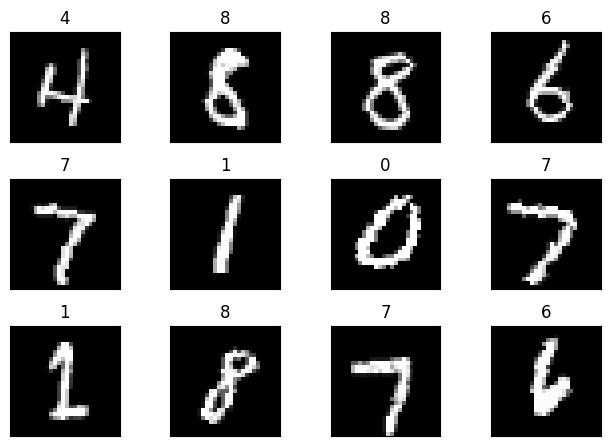

In [18]:
preview_batch_images(train_loader)

In [19]:
model = Model_6_Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.1, verbose=True)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True)
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1,20):
    print(f"epoch: {epoch}")
    this_train_loss = model_train(model, device, train_loader, optimizer, train_acc, train_losses)
    this_loss = model_test(model, device, test_loader, test_acc, test_losses)
    scheduler.step()
    #print(optimizer.)


Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 1


loss=0.13536681234836578 batch_id=468 Accuracy = 87.28: 100%|██████████| 469/469 [00:35<00:00, 13.18it/s]



Test set: Average loss: 0.0968, Accuracy: 9773/10000 (97.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 2


loss=0.17157894372940063 batch_id=468 Accuracy = 96.28: 100%|██████████| 469/469 [00:35<00:00, 13.07it/s]



Test set: Average loss: 0.0495, Accuracy: 9886/10000 (98.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 3


loss=0.113768070936203 batch_id=468 Accuracy = 96.85: 100%|██████████| 469/469 [00:35<00:00, 13.03it/s]



Test set: Average loss: 0.0427, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 4


loss=0.055129844695329666 batch_id=468 Accuracy = 97.31: 100%|██████████| 469/469 [00:36<00:00, 13.02it/s]



Test set: Average loss: 0.0378, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 5


loss=0.0913006067276001 batch_id=468 Accuracy = 97.45: 100%|██████████| 469/469 [00:35<00:00, 13.11it/s]



Test set: Average loss: 0.0384, Accuracy: 9896/10000 (98.96%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 6


loss=0.2152997851371765 batch_id=468 Accuracy = 97.58: 100%|██████████| 469/469 [00:36<00:00, 12.72it/s]



Test set: Average loss: 0.0281, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 7


loss=0.09591227024793625 batch_id=468 Accuracy = 97.73: 100%|██████████| 469/469 [00:35<00:00, 13.08it/s]



Test set: Average loss: 0.0314, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
epoch: 8


loss=0.08311228454113007 batch_id=468 Accuracy = 97.75: 100%|██████████| 469/469 [00:36<00:00, 13.00it/s]



Test set: Average loss: 0.0285, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 9


loss=0.13652192056179047 batch_id=468 Accuracy = 98.03: 100%|██████████| 469/469 [00:35<00:00, 13.09it/s]



Test set: Average loss: 0.0240, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 10


loss=0.07248818129301071 batch_id=468 Accuracy = 98.12: 100%|██████████| 469/469 [00:35<00:00, 13.04it/s]



Test set: Average loss: 0.0239, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 11


loss=0.11200869083404541 batch_id=468 Accuracy = 98.09: 100%|██████████| 469/469 [00:35<00:00, 13.08it/s]



Test set: Average loss: 0.0244, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 12


loss=0.13739822804927826 batch_id=468 Accuracy = 98.12: 100%|██████████| 469/469 [00:36<00:00, 12.98it/s]



Test set: Average loss: 0.0236, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 13


loss=0.1666507124900818 batch_id=468 Accuracy = 98.16: 100%|██████████| 469/469 [00:36<00:00, 13.00it/s]



Test set: Average loss: 0.0236, Accuracy: 9940/10000 (99.40%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 14


loss=0.05113256350159645 batch_id=468 Accuracy = 98.18: 100%|██████████| 469/469 [00:35<00:00, 13.20it/s]



Test set: Average loss: 0.0233, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 15


loss=0.17289601266384125 batch_id=468 Accuracy = 98.14: 100%|██████████| 469/469 [00:35<00:00, 13.37it/s]



Test set: Average loss: 0.0253, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 16


loss=0.011188201606273651 batch_id=468 Accuracy = 98.27: 100%|██████████| 469/469 [00:35<00:00, 13.24it/s]



Test set: Average loss: 0.0235, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-04.
epoch: 17


loss=0.03985319286584854 batch_id=468 Accuracy = 98.22: 100%|██████████| 469/469 [00:34<00:00, 13.40it/s]



Test set: Average loss: 0.0243, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-04.
epoch: 18


loss=0.11830814927816391 batch_id=468 Accuracy = 98.16: 100%|██████████| 469/469 [00:35<00:00, 13.33it/s]



Test set: Average loss: 0.0234, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-04.
epoch: 19


loss=0.020251015201210976 batch_id=468 Accuracy = 98.19: 100%|██████████| 469/469 [00:34<00:00, 13.43it/s]



Test set: Average loss: 0.0237, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-04.


Plot Statistics

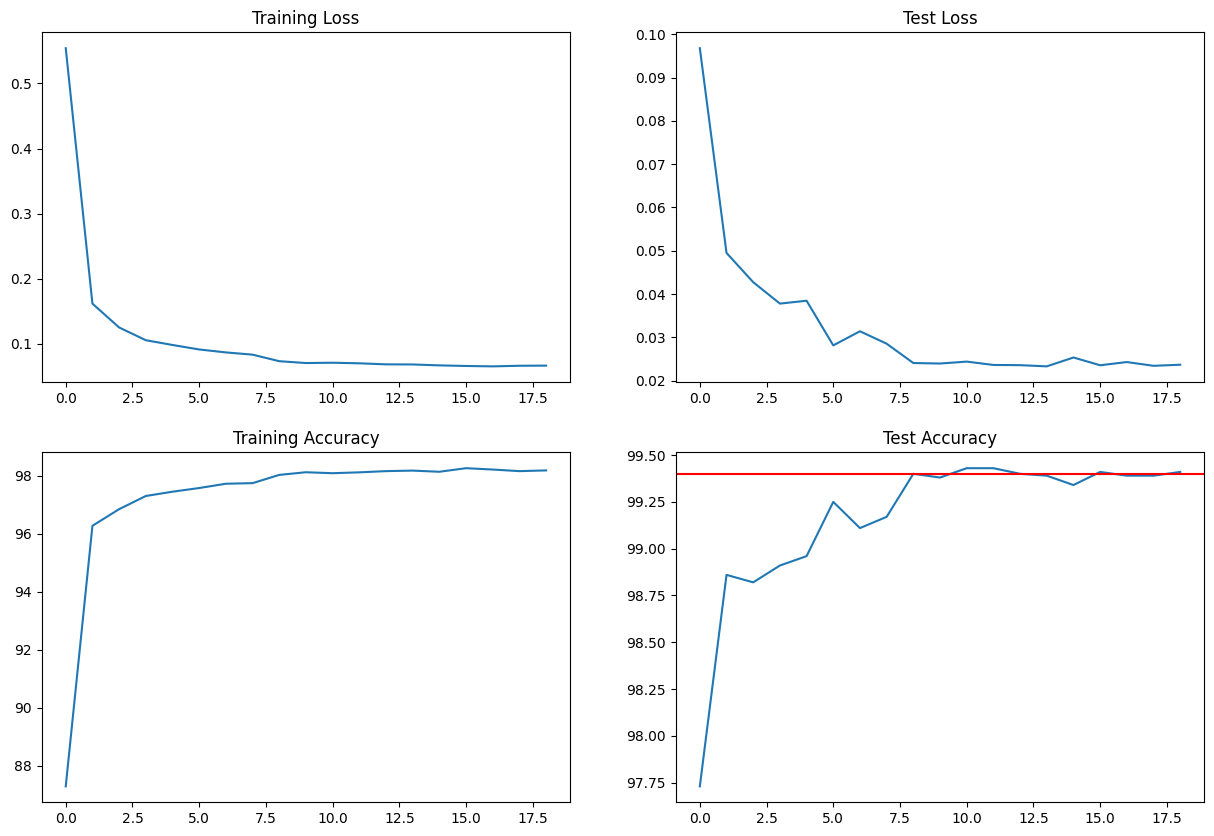

In [20]:
plot_statistics(train_losses, train_acc, test_losses, test_acc)